# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from pprint import pprint
from matplotlib import pyplot
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# **Importing Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Average Region Climate Data.xlsx to Average Region Climate Data.xlsx


In [4]:
df = pd.read_excel('Average Region Climate Data.xlsx')
df.head(5)

,Date,Temperature,Rainfall,Windspeed,Humidity
0,2010-01,22.417600,1.653229,3.5625,69.375
1,2010-02,23.026150,5.403039,3.1375,68.000
2,2010-03,22.941325,2.819284,3.0875,71.500
3,2010-04,23.488287,3.655683,2.7375,76.125
4,2010-05,23.981687,1.675533,2.5750,74.000


# **Climate variables causality network**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

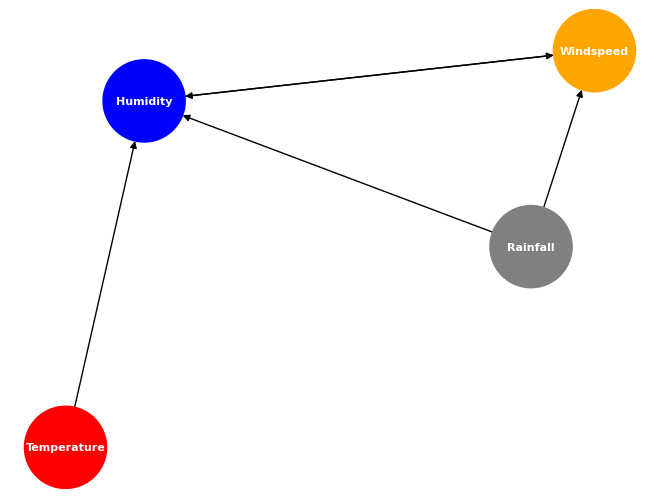

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
#df = pd.read_excel('AVERAGE.xlsx')

# Ensure the Date column is in datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df = df.set_index('Date')

# Select the four variables
Variables = ['Temperature', 'Rainfall', 'Humidity', 'Windspeed']
df = df[Variables]

# Filter data to include only years from 2010 to 2023
df = df[(df.index.year >= 2010) & (df.index.year <= 2023)]

# Perform Granger causality tests with maxlag 168
Maxlag = 54
test_result = {}

for Var1 in Variables:
    for Var2 in Variables:
        if Var1 != Var2:
            test_result[(Var1, Var2)] = grangercausalitytests(df[[Var1, Var2]], maxlag=Maxlag, verbose=False)

# Function to calculate average p-values from the test results
def calculate_average_p_values(results):
    average_p_values = {}
    for key, value in results.items():
        all_p_values = [test[0]['ssr_ftest'][1] for lag, test in value.items()]
        average_p_values[key] = sum(all_p_values) / len(all_p_values)
    return average_p_values

average_p_values = calculate_average_p_values(test_result)

# Visualize the causal relationships using a directed graph
G = nx.DiGraph()

# Add nodes
for Var in Variables:
    G.add_node(Var)

# Add edges for relationships with average p-values below significance level (e.g., 0.05)
Significance_level = 0.2
for (Var1, Var2), p_value in average_p_values.items():
    if p_value < Significance_level:
        G.add_edge(Var1, Var2)

# Define colors for each variable
Color_map = {
    'Temperature': 'red',
    'Humidity': 'blue',
    'Rainfall': 'grey',
    'Windspeed': 'orange'
}

# Get node colors
Node_colors = [Color_map[Node] for Node in G.nodes()]

# Layout the graph using a layout
Pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, Pos, node_color=Node_colors, with_labels=True, edge_color='black', node_size=3500, font_size=8, font_color='white', font_weight='bold')

# Show the plot
plt.show()


# **Analysis of Climate variables causality network**

The Granger causality test was used to find the hidden predictive relationship between four critical climate variables. As shown in above Figure each node represents a variable while the direct edges indicate causal influences between variables where past values of one variable help to predict future values of another. There are several relationships captured:
1 - There is a direct connection from rainfall to both humidity and wind speed which means using rainfall values can predict future values of humidity and wind speed; then any shifts in rainfall values will be followed by changes in humidity and wind speed.  
2 - The direct edge from temperature to humidity.  
3 - The direct link from humidity to wind speed.  
4 - A bidirectional relationship exists between wind speed and humidity, which forms a feedback loop.  
These findings approve the complex and interdependent nature of climate variables in East Africa region, and detection of these causal links is essential for improving climate models, reliability and predicting weather patterns, which can help in prepare for climate-related events
and develop effective environmental policies.

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Average Region Climate Data.xlsx to Average Region Climate Data (1).xlsx


In [9]:
df = pd.read_excel('Average Region Climate Data.xlsx')
df.head(5)

,Date,Temperature,Rainfall,Windspeed,Humidity
0,2010-01,22.417600,1.653229,3.5625,69.375
1,2010-02,23.026150,5.403039,3.1375,68.000
2,2010-03,22.941325,2.819284,3.0875,71.500
3,2010-04,23.488287,3.655683,2.7375,76.125
4,2010-05,23.981687,1.675533,2.5750,74.000


## **Causal Relationship of critical climate variables in EA over time (2010 – 2023) **

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

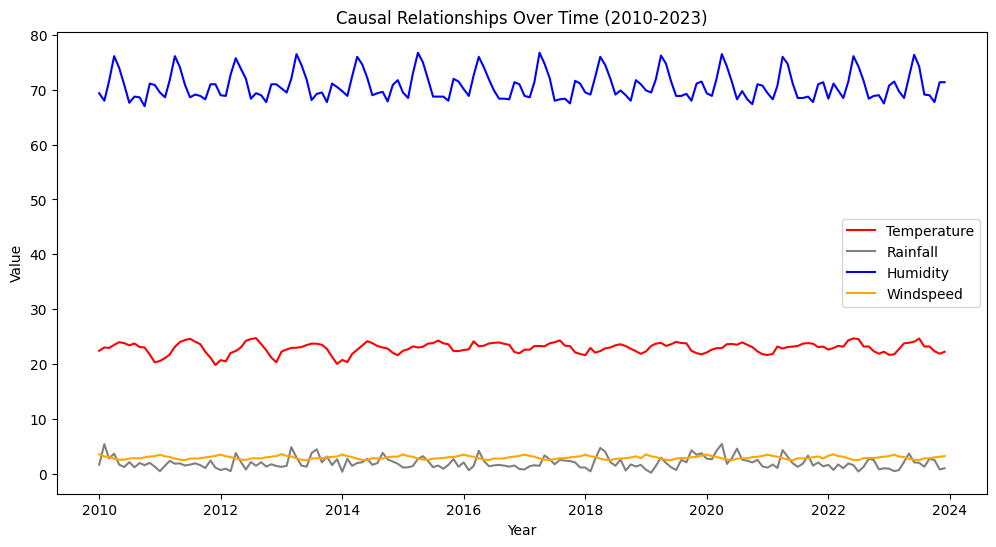

In [10]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df = df.set_index('Date')

# Select the four variables
Variables = ['Temperature', 'Rainfall', 'Humidity', 'Windspeed']
df = df[Variables]

# Filter data to include only years from 2010 to 2023
df = df[(df.index.year >= 2010) & (df.index.year <= 2023)]

# Perform Granger causality tests
Maxlag = 12  # You can adjust this based on your data's periodicity
test_result = {}

for Var1 in Variables:
    for Var2 in Variables:
        if Var1 != Var2:
            test_result[(Var1, Var2)] = grangercausalitytests(df[[Var1, Var2]], maxlag=Maxlag, verbose=False)

# Function to extract p-values from the test results
def extract_p_values(results):
    p_values = {}
    for key, value in results.items():
        for lag, test in value.items():
            p_values[(key[0], key[1], lag)] = test[0]['ssr_ftest'][1]
    return p_values

p_values = extract_p_values(test_result)

# Identify significant causal relationships
Significance_level = 0.05
causal_relationships = [(Var1, Var2) for (Var1, Var2, lag), p_value in p_values.items() if p_value < Significance_level]

# Define a function to plot causal relationships over time (all variables in one plot)
def plot_causal_relationships_over_time(df, causal_relationships):
    color_map = {
        'Temperature': 'red',
        'Humidity': 'blue',
        'Rainfall': 'grey',
        'Windspeed': 'orange'
    }

    plt.figure(figsize=(12, 6))
    for Var in df.columns:
        plt.plot(df.index, df[Var], label=Var, color=color_map[Var])

    plt.title('Causal Relationships Over Time (2010-2023)')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Use the function to plot causal relationships over time (all variables in one plot)
plot_causal_relationships_over_time(df, causal_relationships)


 **Analysis of Causal Relationship of critical climate variables in EA over time (2010 – 2023)**

The temporal trends of the climate variables were illustrated by using the Granger causality test, clarified values of these variables over 14 years as shown in Figure above found that temperature (red) shows moderate variability, rainfall (grey) has irregular values, humidity (blue) consistently has the highest values with strong seasonal patterns, and wind speed (orange) has the lowest values.